In [102]:
import pyforest
#import dtale
data = pd.read_csv(r'train.csv')
#d = dtale.show(data)
#d.open_browser()

<IPython.core.display.Javascript object>

In [103]:
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,1


In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      678 non-null    object 
 1   A2      678 non-null    float64
 2   A3      690 non-null    float64
 3   A4      684 non-null    object 
 4   A5      684 non-null    object 
 5   A6      681 non-null    object 
 6   A7      681 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     677 non-null    float64
 14  A15     690 non-null    int64  
 15  A16     690 non-null    int64  
dtypes: float64(4), int64(3), object(9)
memory usage: 86.4+ KB


In [105]:
data.describe()

,A2,A3,A8,A11,A14,A15,A16
count,678.000000,690.000000,690.000000,690.00000,677.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,184.014771,1017.385507,0.444928
std,11.957862,4.978163,3.346513,4.86294,173.806768,5210.102598,0.497318
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,0.00000,75.000000,0.000000,0.000000
50%,28.460000,2.750000,1.000000,0.00000,160.000000,5.000000,0.000000
75%,38.230000,7.207500,2.625000,3.00000,276.000000,395.500000,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,1.000000


In [106]:
df_test = pd.read_csv('test.csv')
df_test.head()

<IPython.core.display.Javascript object>

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,44.25,11.00,y,p,d,v,1.500,t,f,0,f,s,0,0,0
1,b,23.58,0.46,y,p,w,v,2.625,t,t,6,t,g,208,347,0
2,b,23.92,1.50,u,g,d,h,1.875,t,t,6,f,g,200,327,1
3,b,33.17,1.00,u,g,x,v,0.750,t,t,7,t,g,340,4071,1
4,b,48.33,12.00,u,g,m,v,16.000,t,f,0,f,s,110,0,1


In [107]:
data.isna().sum()

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [108]:
data.fillna(data.mean(), inplace=True) #replace numerical missing values with median

In [109]:
df_test.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [110]:
data.isna().sum() #now only categorical features have missing values

A1     12
A2      0
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14     0
A15     0
A16     0
dtype: int64

In [111]:
data= data.apply(lambda x: x.fillna(x.value_counts().index[0]))


In [112]:
data.isna().sum() 

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [113]:
data.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.250,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.040,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.500,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.750,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.710,t,f,0,f,s,120.0,0,1
5,b,32.08,4.000,u,g,m,v,2.500,t,f,0,t,g,360.0,0,1
6,b,33.17,1.040,u,g,r,h,6.500,t,f,0,t,g,164.0,31285,1
7,a,22.92,11.585,u,g,cc,v,0.040,t,f,0,f,g,80.0,1349,1
8,b,54.42,0.500,y,p,k,h,3.960,t,f,0,f,g,180.0,314,1
9,b,42.50,4.915,y,p,w,v,3.165,t,f,0,t,g,52.0,1442,1


In [114]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
data.A1=labelencoder.fit_transform(data.A1.values)
data.A4=labelencoder.fit_transform(data.A4.values)
data.A5=labelencoder.fit_transform(data.A5.values)
data.A6=labelencoder.fit_transform(data.A6.values)
data.A7=labelencoder.fit_transform(data.A7.values)
data.A9=labelencoder.fit_transform(data.A9.values)
data.A10=labelencoder.fit_transform(data.A10.values)
data.A13=labelencoder.fit_transform(data.A13.values)
data.A12=labelencoder.fit_transform(data.A12.values)


In [115]:
df_test.A1=labelencoder.fit_transform(df_test.A1.values)
df_test.A4=labelencoder.fit_transform(df_test.A4.values)
df_test.A5=labelencoder.fit_transform(df_test.A5.values)
df_test.A6=labelencoder.fit_transform(df_test.A6.values)
df_test.A7=labelencoder.fit_transform(df_test.A7.values)
df_test.A9=labelencoder.fit_transform(df_test.A9.values)
df_test.A10=labelencoder.fit_transform(df_test.A10.values)
df_test.A12=labelencoder.fit_transform(df_test.A12.values)
df_test.A13=labelencoder.fit_transform(df_test.A13.values)

In [116]:
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,1
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,1
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,1
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,1
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,1


In [117]:
df_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,44.25,11.00,1,1,3,5,1.500,1,0,0,0,1,0,0,0
1,1,23.58,0.46,1,1,11,5,2.625,1,1,6,1,0,208,347,0
2,1,23.92,1.50,0,0,3,2,1.875,1,1,6,0,0,200,327,1
3,1,33.17,1.00,0,0,12,5,0.750,1,1,7,1,0,340,4071,1
4,1,48.33,12.00,0,0,8,5,16.000,1,0,0,0,1,110,0,1


In [118]:
list_drop = ['A5']
data.drop(list_drop, axis=1, inplace=True)
df_test.drop(list_drop, axis=1, inplace=True)

<IPython.core.display.Javascript object>

<AxesSubplot:>

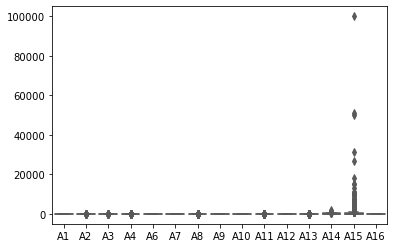

In [119]:
sns.boxplot(data=data, orient="v", palette="Set2")

<IPython.core.display.Javascript object>

<AxesSubplot:>

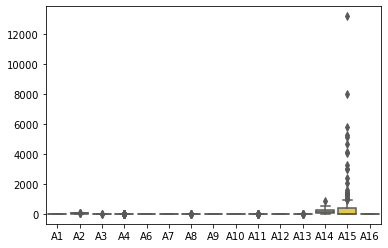

In [120]:
sns.boxplot(data=df_test, orient="v", palette="Set2")

In [121]:
def handle_outlier(df,col):
    for x in col:
        IQR=df[x].quantile(0.75) - df[x].quantile(0.25)
        ext=df[x].quantile(0.75) + IQR*1.5
        median = df[x].median()
        df[x]=np.where(df[x]>ext,median,df[x])

In [122]:
cols=['A3','A2','A8','A11','A14','A15']

In [123]:

handle_outlier(data,cols)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

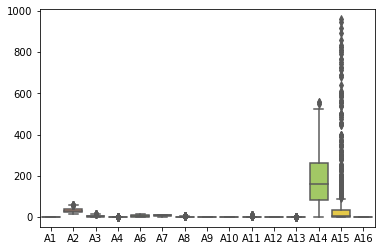

In [124]:
sns.boxplot(data=data, orient="v", palette="Set2")

In [125]:
cols_test=['A3','A2','A8','A11','A14','A15','A13']

In [126]:
handle_outlier(df_test,cols_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

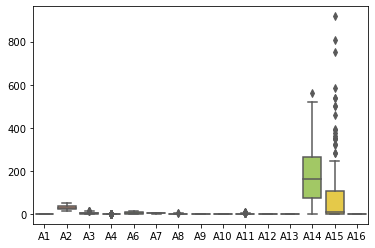

In [127]:
sns.boxplot(data=df_test, orient="v", palette="Set2")

In [128]:
X_train=data.iloc[ : , 0:14]
Y_train=data.iloc[ : , 14:]
X_test=data.iloc[ : , 0:14]
Y_test=data.iloc[ : , 14:]

In [129]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [130]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(random_state=0,criterion="entropy",n_estimators=10)
model=forest.fit(X_train,Y_train.values.ravel())
print('Random forest accuracy:',forest.score(X_train,Y_train))
        

Random forest accuracy: 0.9869565217391304


In [131]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(Y_test.values.ravel(),model.predict(X_test)))
print(accuracy_score(Y_test.values.ravel(),model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       383
           1       0.99      0.98      0.99       307

    accuracy                           0.99       690
   macro avg       0.99      0.99      0.99       690
weighted avg       0.99      0.99      0.99       690

0.9869565217391304


In [132]:
test_test=df_test.iloc[ : , 0:14]
test_Y=df_test.iloc[:,14:]

In [133]:
from sklearn.preprocessing import StandardScaler
X_train=StandardScaler().fit_transform(X_train)
X_test=StandardScaler().fit_transform(X_test)

In [134]:
model.predict(test_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1], dtype=int64)

In [135]:
print(accuracy_score(test_Y.values.ravel(),model.predict(test_test)))

0.39705882352941174
